<a href="https://colab.research.google.com/github/ShivaanshBawa/CODSOFT_SALES/blob/main/salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

#Data collection and preprocessing

In [ ]:
Saledata = pd.read_csv('drive/MyDrive/Salesreco/ads.csv')

In [ ]:
Saledata.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
Saledata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


##Check for any missing values

In [ ]:
Saledata.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#Data analysis

##Getting some Statistical Measures about Data

In [ ]:
Saledata.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#Data visualisation

##Displaying number of sales on each advertising platform

In [ ]:
sns.set()

##Histogram

###1.TV expenditure w.r.t sales

<Axes: xlabel='TV', ylabel='Count'>

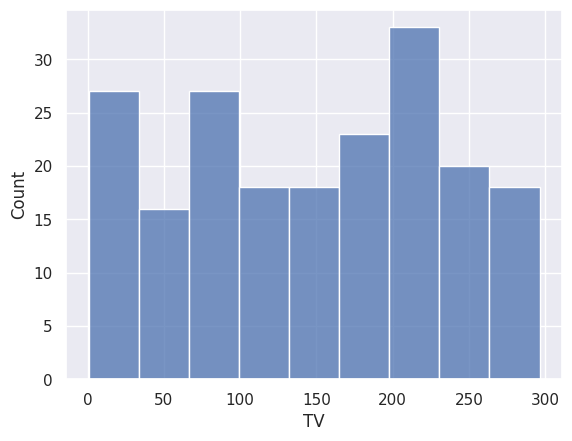

In [ ]:
sns.histplot(Saledata['TV'])

###2.Radio expenditure w.r.t Sales

<Axes: xlabel='Radio', ylabel='Count'>

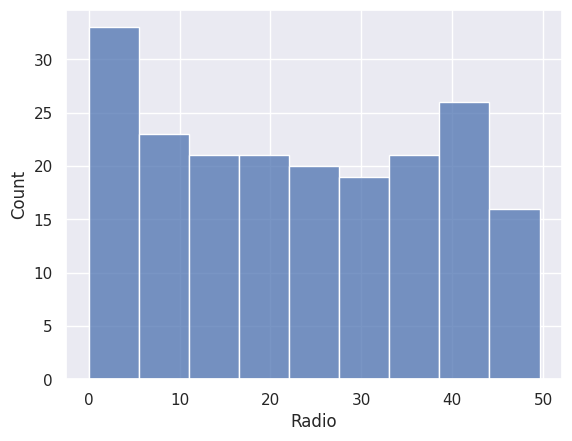

In [ ]:
sns.histplot(Saledata['Radio'])

###3.Newspaper expenditure w.r.t Sales

<Axes: xlabel='Newspaper', ylabel='Count'>

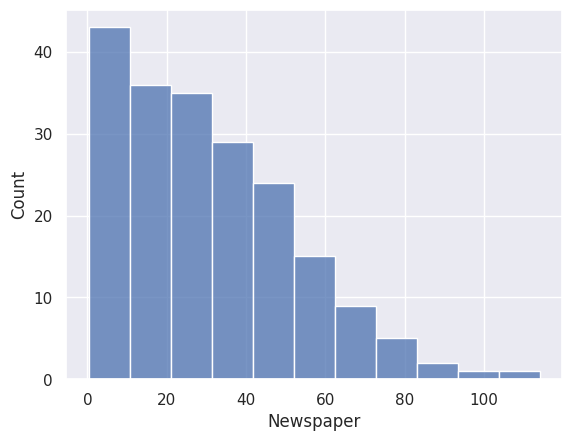

In [ ]:
sns.histplot(Saledata['Newspaper'])

###4.Sales

<Axes: xlabel='Sales', ylabel='Count'>

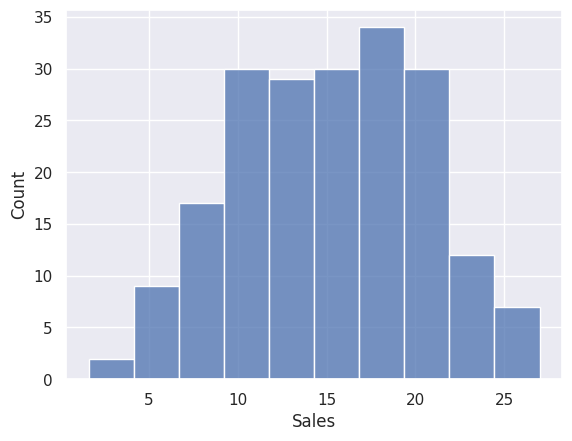

In [ ]:
sns.histplot(Saledata['Sales'])

###Comparison between the three platforms w.r.t Sales

####a) Scatterplot

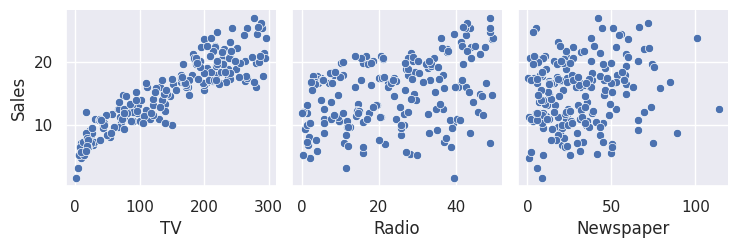

In [ ]:
sns.pairplot(Saledata,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

####b) kernel density estimate (KDE) plot

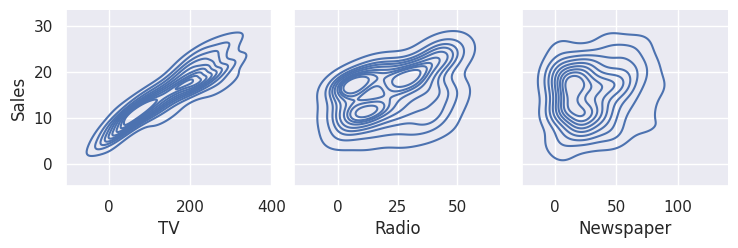

In [ ]:
sns.pairplot(Saledata,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='kde')

#Correlation matrix

In [ ]:
Saledata.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
Correlate = Saledata.corr()

<Axes: >

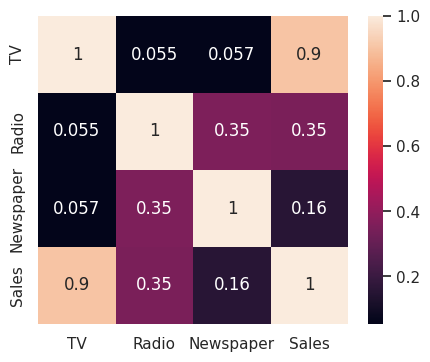

In [ ]:
fig,ax = plt.subplots(figsize = (5,4))
sns.heatmap(Correlate,annot = True, ax=ax)

#Encoding the columns

In [ ]:
En = LabelEncoder()

In [ ]:
Saledata['Sales'] = En.fit_transform(Saledata['Sales'])

In [ ]:
Saledata.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,106
1,44.5,39.3,45.1,28
2,17.2,45.9,69.3,40
3,151.5,41.3,58.5,66
4,180.8,10.8,58.4,80


#Separating features and target

Note : as we observed in the above visual charts , the expenditure incurred on TV ads yields the highest amount of sales when compared with expenditure incurred on Radio and Newspaper ads respectively. So for selecting The features we shall discard Radio and Newspaper columns from this evaluation for better understanding.

In [ ]:
X = Saledata.drop(columns = ['Radio','Newspaper','Sales'],axis = 1)
Y = Saledata['Sales']

In [ ]:
print(X)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]


In [ ]:
print(Y)

0      106
1       28
2       40
3       66
4       80
      ... 
195     14
196     52
197     56
198    118
199     84
Name: Sales, Length: 200, dtype: int64


##Splitting data into Training and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state= 3)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(200, 1) (160, 1) (40, 1)


#Model Training

##Linear Regression model

In [ ]:
Model = LinearRegression()

###Training the LinearRegression model with Training Data

In [ ]:
Model.fit(X_train,Y_train)

LinearRegression()

#Model Evaluation

##R Squared or R2 score

###R Squared of Training data

In [ ]:
X_train_predict = Model.predict(X_train)

In [ ]:
print(X_train_predict)

[ 41.29466574  34.5554546    9.10417849  77.67923652 101.30232238
 106.89443375  58.28608106   7.88538498  89.47285602  69.04014139
  48.10557062  74.99072144  46.99431771  10.6455938   99.18735718
  10.43051259 108.5075428  112.62993259 106.82274002  75.16995578
  50.82993257  54.0203038   46.99431771   9.57018777 112.88086067
  86.42587226  13.80011816  42.58515298  93.70278641  84.13167272
  10.7531344   35.6667075  108.07738039  85.95986298  14.37366805
  84.84861008  66.60255438  29.96705553  42.1191437   85.67308803
  10.71728753  73.09083745  93.70278641  57.06728756  52.69396969
  66.24408571  81.80162632  56.4578908   91.69536182  12.36624345
  63.77065183  76.13782121  69.4703038   47.31693952  20.86195111
  44.4491901   33.94605785  67.42703234  24.94849404  70.40232237
 111.8413015   32.36879567  79.2564987   38.8929256  111.48283283
  31.93863325  60.43689313  12.33039658  16.63202072  92.73492098
  17.49234554  77.06983977  70.61740357  31.3292365   84.16751959
  84.59768

In [ ]:
training_data_r = r2_score(Y_train,X_train_predict)
print('R Squared of Training Data:', training_data_r)

R Squared of Training Data: 0.8236611866891226


###R Squared of Test data

In [ ]:
X_test_predict = Model.predict(X_test)

In [ ]:
print(X_test_predict)

[ 78.95087913  44.15470335  72.95271367  70.26035531  26.97813862
  35.60050147 107.95337236  40.50809139  77.79214262  85.73289576
  66.37517995  33.24894796  99.53549242  23.39968763  54.82189534
  67.32943355  65.59132878  61.56983148  70.26035531  81.77955943
  79.4961669   45.58608375  18.0490514   29.53417504  29.09112872
  39.14487197  85.01720556  86.27818353 110.95245509  35.94130633
  54.61741242  91.69698074  13.92531264  42.55292053  24.62658511
  42.04171324  71.55541376  19.07146596  57.41201224  57.7528171 ]


In [ ]:
test_data_r = r2_score(Y_test,X_test_predict)
print('R Squared of Test Data:',test_data_r)

R Squared of Test Data: 0.7825977360754828
